In [3]:
# Finding the density profile of M33's stellar disk
# March 13 2018

In [4]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

# my modules
from ReadFile import Read
from CenterOfMass import CenterOfMass
from MassDistribution import MassProfile

# yt 
#import yt
#from yt.units import kiloparsec, Msun, Gyr

In [5]:
# Create a COM of object for M33 Disk Using Code from Assignment 4
# using M33 data

COMD = CenterOfMass("M33_000.txt",2)

#Create Mass profile object for M33 disk
MProfile = MassProfile('M33',0)

In [6]:
# Compute COM of M33 using disk particles
COMPx, COMPy, COMPz = COMD.COM_P(0.1, 4.0)
# In assignment 6 you are asked to modify the CenterOfMass.py file so that 
# in addition to a 'delta' (tolerance) there is also a volume decrement value.  
# dividing the volume by 4.0 actually works better than dividing by half (RMAX/4 instead)

# store COM Velocity
COMV = COMD.COM_V()

## (PART 1) Edit Below:  
### Define the remaining data properties: yD, zD, vxD, vyD, vzD 

In [10]:
# Determine positions and velocities of disk particles relative to COM motion
xD = COMD.x - float(COMPx)
yD = COMD.y - float(COMPy)
zD = COMD.z - float(COMPz)
vxD = COMD.vx - float(COMV[0])
vyD = COMD.vy - float(COMV[1])
vzD = COMD.vz - float(COMV[2])

#total velocity and 3D position 
vtot = np.sqrt(vxD**2 + vyD**2 + vzD**2)
rD = np.sqrt(xD**2 + yD**2 + zD**2)
#storing the mass enclosed within each radii
Mass = MProfile.MassEnclosed(2,rD)

## (PART 2) Edit Below: 
### What position coordinates should you plot against each other to create a face-on representation of a galaxy's disk? Use the hist2d function in matplotlib to test this. Start with bins=100.

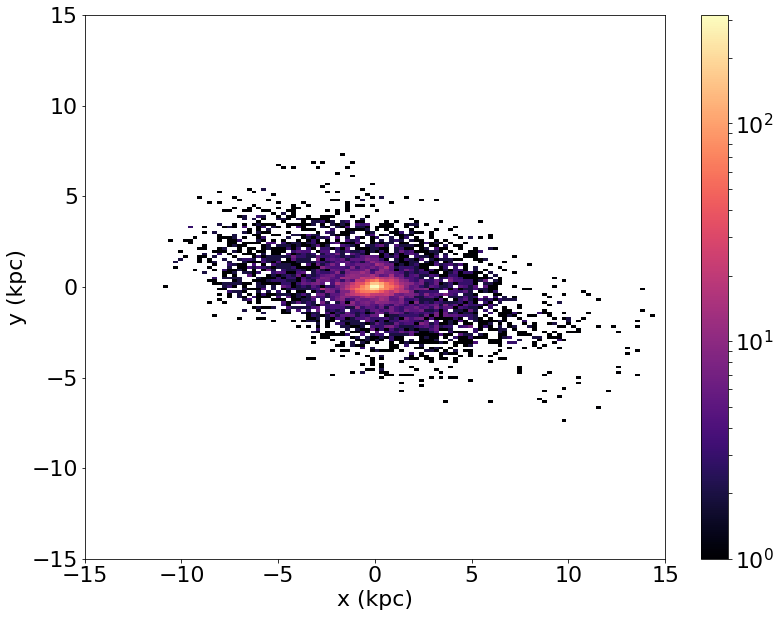

In [11]:
# M33 Disk Density, face on

fig = plt.figure(figsize=(13,10))
ax = plt.subplot(111)

#### PLACE FUNCTION HERE ####
plt.hist2d(xD, yD, bins=100, norm=LogNorm(), cmap='magma')
plt.colorbar()

# Add axis labels, edited
#plt.xlabel('r',fontsize=22)
#plt.ylabel('number',fontsize=22)
plt.xlabel('x (kpc)', fontsize=22)
plt.ylabel('y (kpc)', fontsize=22)

#set axis limits
plt.ylim(-15,15)
plt.xlim(-15,15)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# Save to a file
ax.set_rasterized(True)

## (PART 3) Edit:
## Notice that M33 is at an angle and it will be useful to rotate it.
## Following steps from In Class Lab 7 to rotate galaxy



(-20, 20)

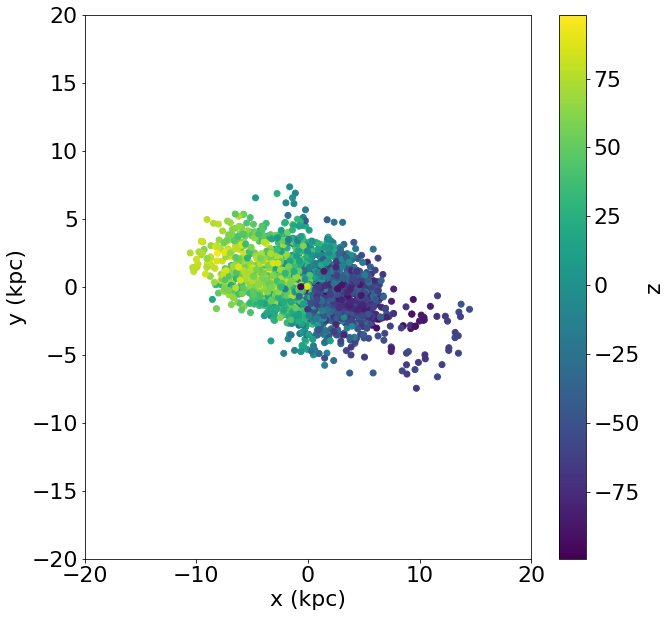

In [14]:
#Plot weighted velocities
fig  = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

#pick stars that are roughly following the rotation curve
#in the case of M33 at time zero that is +/-100km/s
index = np.where(abs(vtot)<100)
plt.scatter(xD[index],yD[index],c=vzD[index])

#colorbar
cbar = plt.colorbar()
cbar.set_label(r'z', size=22)


# add the contour plot
#density_contour(xD[index], yD[index], 100, 100, ax=ax, colors=['red', 'red', 'red'])


# Add axis labels
plt.xlabel('x (kpc)', fontsize=22)
plt.ylabel('y (kpc)', fontsize=22)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

#set axis limits
plt.ylim(-20,20)
plt.xlim(-20,20)


## Function taken from In Class Lab 7 to rotate position and velocity vectors so angular momentum is aligned with z axis

In [25]:
def RotateFrame(pos,vel):
    #input 3D array for position and velocity 
    #returns: rotated position and velocity vectors so that the ang mom is aligned with z axis
    
    #computing angular momentum
    L = np.sum(np.cross(pos,vel), axis=0)
    L_norm = L/np.sqrt(np.sum(L**2))
    
    #set up rotation matrix to align L with Z unit vector because disk lies in xy plane
    Z = np.array([0,0,1])  #z unit vector
    
    #cross product of L and Z
    LZcross = np.cross(L_norm,Z)
    s = np.sqrt(np.sum(LZcross**2))  #normalized cross product is equivalent to sine of angle bw the two
    
    #dot product of L and Z
    LZdot = np.dot(L_norm,Z)  #equivalent to cosine of angle bw the two
    
    #Identity matrix
    I = np.array([[1,0,0],[0,1,0],[0,0,1]])
    
    #skew-symmetric cross product of LZcross
    v_x = np.array([[0, -LZcross[2], LZcross[1]], [LZcross[2], 0, -LZcross[0]], [-LZcross[1], LZcross[0], 0]])
    
    #rotation matrix equation
    R = I + v_x + np.dot(v_x,v_x)*(1-LZdot)/s**2
    
    #rotate coordinates
    rotpos = np.dot(R,pos.T).T
    rotvel = np.dot(R,vel.T).T
    
    return rotpos, rotvel


In [26]:
#apply Rotate Frame to indexed position and velocity vectors
r = np.array([xD,yD,zD]).T
v = np.array([vxD,vyD,vzD]).T
rn, vn = RotateFrame(r[index],v[index])

(-20, 20)

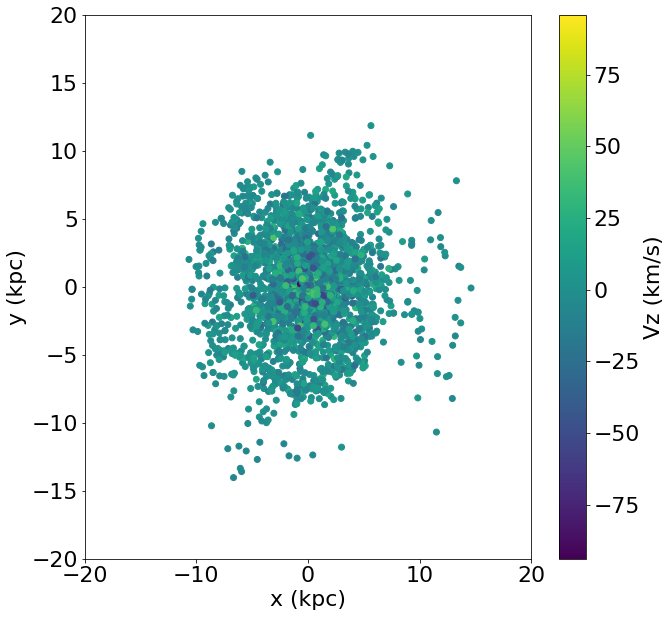

In [28]:
#plot rotated velocities
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

# plot position of disk particles color coded by velocity along the 3rd axis -- EDIT BELOW
plt.scatter(rn[:,0], rn[:,1],c=vn[:,2])

#colorbar
cbar = plt.colorbar()
cbar.set_label(r'Vz (km/s)', size=22)

# Add axis labels
plt.xlabel('x (kpc)', fontsize=22)
plt.ylabel('y (kpc)', fontsize=22)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

#set axis limits
plt.ylim(-20,20)
plt.xlim(-20,20)


## Using rotated positions replot density diagram

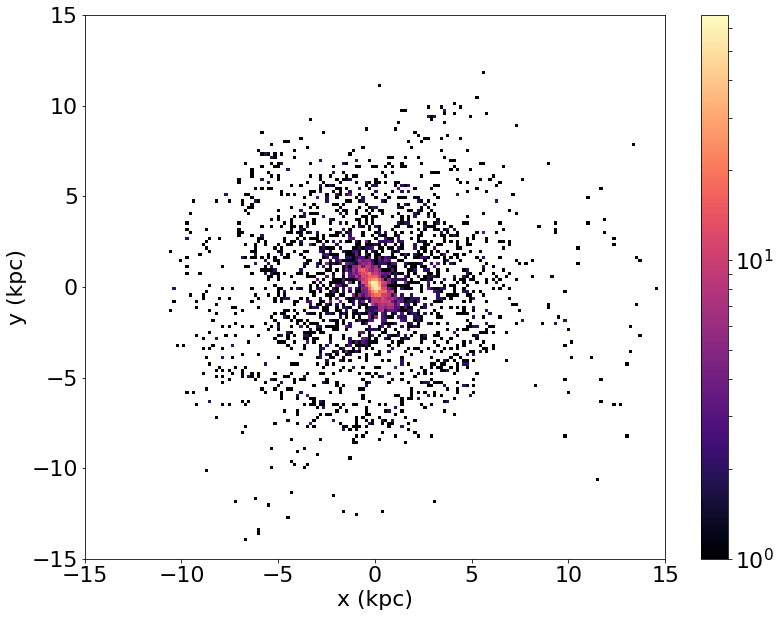

In [30]:
# M33 Disk Density, face on, rotated

fig = plt.figure(figsize=(13,10))
ax = plt.subplot(111)

#### PLACE FUNCTION HERE ####
plt.hist2d(rn[:,0], rn[:,1], bins=150, norm=LogNorm(), cmap='magma')
plt.colorbar()

# Add axis labels, edited
#plt.xlabel('r',fontsize=22)
#plt.ylabel('number',fontsize=22)
plt.xlabel('x (kpc)', fontsize=22)
plt.ylabel('y (kpc)', fontsize=22)

#set axis limits
plt.ylim(-15,15)
plt.xlim(-15,15)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


 ## (PART 4) Edit Below:
 
 ### Now let's make a density plot that shows the edge-on M33 rotated disk. Using hist2d again, which position coordinates should you plot against each other to get an edge-on view of the disk? 
 
 ### Use the code below to create this plot. You'll want to use a similar number of bins and the norm=LogNorm() argument again.


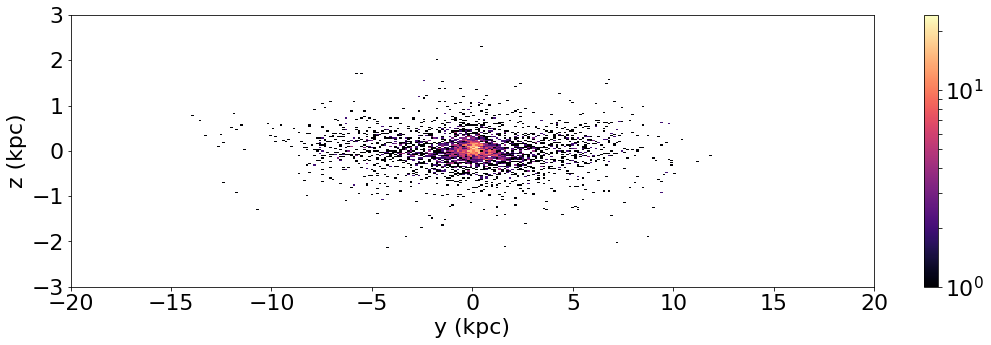

In [33]:
# M33 Disk Density, edge on

fig = plt.figure(figsize=(18,5))
ax = plt.subplot(111)

#### PLACE FUNCTION HERE ####
plt.hist2d(rn[:,1], rn[:,2], bins=200, norm=LogNorm(), cmap='magma')
plt.colorbar()

# Add axis labels
plt.xlabel('y (kpc)', fontsize=22)
plt.ylabel('z (kpc)', fontsize=22)

#set axis limits
plt.ylim(-3,3)
plt.xlim(-20,20)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


# Save to a file
#ax.set_rasterized(True)

You'll see the disk is fairly thin with a scale height < 1 kpc. Notice the X-shape at the center of the disk as well. This is due to the interaction between disk stars and the bar. Bulge particles are not shown here. 

## (PART 5) Edit Above: 

### Does the densest part of the MW disk in your face-on and edge-on plots reside at position=(0,0)? Re-center your particles using COMP. You can do this by changing the quantity COMP back to floats by doing the following to all position particles:

xD = COMD.x - float(COMP[0]/u.kpc)}

### Do the same for velocity using COMV. Be careful with the units.

### Recreate the two plots above in the center of mass reference frame.
## ----------------------------------------------------------------------------------------------------------

# *** OPTIONAL *** 

### You can change the colorbar used in the hist2d function using the cmap argument. Set cmap to one of the colorbars (i.e. cmap='magma') from this page: https://matplotlib.org/users/colormaps.html

### The perceptually uniform sequential color maps are the best options because they are also legible in grayscale.
## ----------------------------------------------------------------------------------------------------------

## (PART 6) Edit Below:

### Now we will create a phase diagram and compare it to the circular velocity assuming spherical symmetry. If you look at the MW's disk along the y-axis, what velocity component will give you the line of sight velocity? Use your intuition from the edge-on disk plot above. 

### Use hist2d again to plot the y-position of the disk particles against this velocity component. 

### Compare your plot to the plots in InClass5_Slides.pdf. Does your plot match the observational data?

In [34]:
# Create a Mass Profile Object:  Code from Assignment 5
M33V = MassProfile("M33",0)
# note that since CenterOfMass has been modified to have VolDec input, 
# MassProfile.py must be changed to reflect the additional input argument

# Input array of radii
R = np.arange(0.01,30,0.2)

# Store the total circular velocity for later use 
VCirc = M33V.CircularVelocityTotal(R)


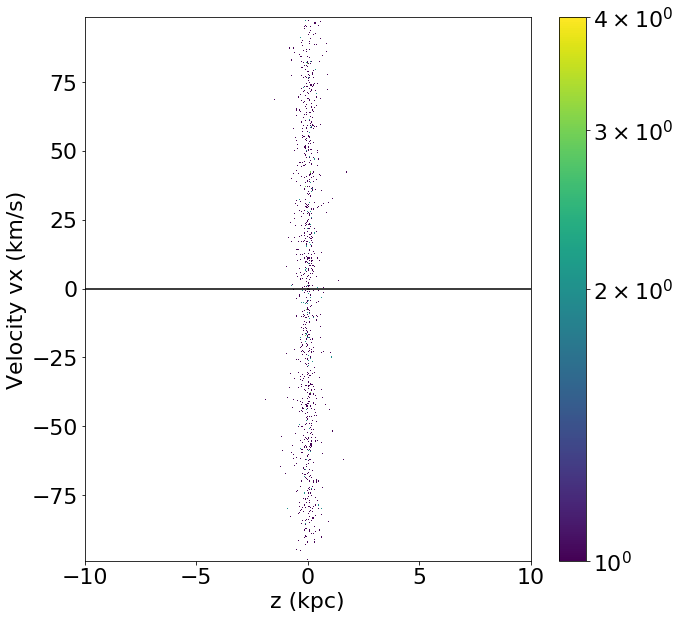

In [35]:
# M33 Disk Velocity Field edge on.

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

# looking at M33 edge on along y axis, what is line of sight velocity component?

#### PLACE FUNCTION HERE ###
plt.hist2d(rn[:,2], vn[:,0], bins=500, norm=LogNorm())
plt.plot(R,VCirc, color='black')
plt.plot(-R,-VCirc, color='black')
plt.colorbar()


# Add axis labels
plt.xlabel('z (kpc)', fontsize=22)
plt.ylabel('Velocity vx (km/s)', fontsize=22)

#set axis limits
#plt.ylim(0,200)
plt.xlim(-10,10)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


# Save to a file
ax.set_rasterized(True)

## (PART 7) Edit Above:

### Now overplot the MW's circular velocity computed with the CircularVelocityTotal() against the radius array. These are already defined as 'VCirc' and 'R' above. 

### Notice the axis limits of the y-axis above. Hint: If you have an array called X, then -X will multiply the whole array by -1. 

### How does the phase diagram compare to the spherically averaged circular velocity? Why is there a spread in velocities?

## ----------------------------------------------------------------------------------------------------------

## (PART 8) Edit Below: 

### Let's isolate an interesting set of particles and explore their origin. This may be helpful to many of your for your final projects. For example, where do the particles with the highest speeds reside and why do they have such high speeds?

### 1. Create a velocity mask that selects all particles from the plot above that have a velocity of 250 km/s or higher. Note that these velocities can be positive or negative.

### 2. Using the plotting code above, create an edge-on plot of just these disk particles. How did these disk stars arrive at this position?
## ----------------------------------------------------------------------------------------------------------

# *** OPTIONAL: Using the yt package to make particle plots ***

Using Anaconda you can install YT on your computer. From the command line type:
conda install yt

You can then open an interactive notebook in your working directory (where your data files are located)
yt notebook

Which will give a message stating that it needs a password (give it any number) and it will also state : "The notebook is now live at: http: blah" Copy the URL into a web browser and it will open a Jupyter notebook that will access your working directory. Then proceed as normal with python script.

YT DOCS: http://yt-project.org/docs/dev/visualizing/plots.html#particle-plots http://yt-project.org/doc/examining/generic_particle_data.html?highlight=loading%20generic%20data

## *See the solutions for this lab for examples of how to use yt to make the same plots as above.*

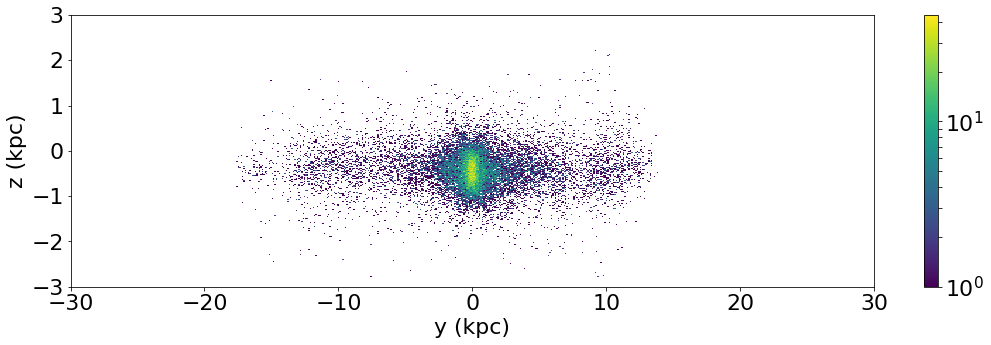

In [43]:
#part 8
#find particles that have velocity 250km/s or higher
index = np.where(abs(vxD)>250)
highvparticley = yD[index]
highvparticlez = zD[index]
#plot these particles ege on
fig = plt.figure(figsize=(18,5))
ax = plt.subplot(111)

#plot the things
plt.hist2d(highvparticley, highvparticlez, bins=300, norm=LogNorm())
plt.colorbar()

# Add axis labels
plt.xlabel('y (kpc)', fontsize=22)
plt.ylabel('z (kpc)', fontsize=22)

#set axis limits
plt.ylim(-3,3)
plt.xlim(-30,30)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


# Save to a file
ax.set_rasterized(True)